In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los archivos JSON
v4 = pd.read_json('../data/V4.json')
v5 = pd.read_json('../data/V5.json')
p4 = pd.read_json('../data/P4.json')
p6 = pd.read_json('../data/P6.json')
m3 = pd.read_json('../data/M3.json')
m5 = pd.read_json('../data/M5.json')
a0 = pd.read_json('../data/A0.json')
a6 = pd.read_json('../data/A6.json')

# Crear una lista de las estaciones
estaciones = [v4, v5, p4, p6, m3, m5, a0, a6]
# Nombres de las estaciones correspondientes
nombres_estaciones = ['V4', 'V5', 'P4', 'P6', 'M3', 'M5', 'A0', 'A6']

# Eliminar columnas no necesarias y agregar la columna 'STATION' con el nombre correspondiente
for estacion, nombre in zip(estaciones, nombres_estaciones):
    estacion.loc[:, 'STATION'] = nombre  # Asignar el nombre de la estación
    estacion.drop(columns=['CA_G_2', 'CA_G_3','CA_P_1', 'CA_P_2', 'CA_P_3', 'CB_G_1', 'CB_G_2', 'CB_G_3',
                           'CB_P_1', 'CB_P_2', 'CB_P_3', 'CC_G_1', 'CC_G_2', 'CC_G_3', 'CC_P_1',
                           'CC_P_2', 'CC_P_3', 'FOSFATO', 'NITRATO', 'NITRITO', 'SILICATO'], inplace=True)

# Asignar RIA a cada estación después de la limpieza de columnas
v4['RIA'] = 4  # Asignar RIA 4 a la estación V4
v5['RIA'] = 4  # Asignar RIA 4 a la estación V5

p4['RIA'] = 3  # Asignar RIA 3 a la estación P4
p6['RIA'] = 3  # Asignar RIA 3 a la estación P6

m3['RIA'] = 2  # Asignar RIA 2 a la estación M3
m5['RIA'] = 2  # Asignar RIA 2 a la estación M5

a0['RIA'] = 1  # Asignar RIA 1 a la estación A0
a6['RIA'] = 1  # Asignar RIA 1 a la estación A6

# Verificar que la columna 'RIA' se haya agregado correctamente
for estacion in estaciones:
    print(estacion[['STATION', 'RIA']].head())  # Mostrar las primeras filas para verificar


  STATION  RIA
0      V4    4
1      V4    4
2      V4    4
3      V4    4
4      V4    4
  STATION  RIA
0      V5    4
1      V5    4
2      V5    4
3      V5    4
4      V5    4
  STATION  RIA
0      P4    3
1      P4    3
2      P4    3
3      P4    3
4      P4    3
  STATION  RIA
0      P6    3
1      P6    3
2      P6    3
3      P6    3
4      P6    3
  STATION  RIA
0      M3    2
1      M3    2
2      M3    2
3      M3    2
4      M3    2
  STATION  RIA
0      M5    2
1      M5    2
2      M5    2
3      M5    2
4      M5    2
  STATION  RIA
0      A0    1
1      A0    1
2      A0    1
3      A0    1
4      A0    1
  STATION  RIA
0      A6    1
1      A6    1
2      A6    1
3      A6    1
4      A6    1


In [3]:
for estacion in estaciones:
    print(estacion.isna().sum()[estacion.isna().sum() > 0])
    print("--------------------------------")

TEMPERATURA     7
SALINIDAD       7
UI              7
UI_1            8
UI_2            9
UI_3           10
UI_4           11
BLOOM_1w        1
BLOOM_2w        2
dtype: int64
--------------------------------
UI          5
UI_1        6
UI_2        7
UI_3        8
UI_4        9
BLOOM_1w    1
BLOOM_2w    2
dtype: int64
--------------------------------
UI           7
UI_1         8
UI_2         9
UI_3        10
UI_4        11
BLOOM_1w     1
BLOOM_2w     2
dtype: int64
--------------------------------
UI           7
UI_1         8
UI_2         9
UI_3        10
UI_4        11
BLOOM_1w     1
BLOOM_2w     2
dtype: int64
--------------------------------
TEMPERATURA     2
SALINIDAD       2
UI              5
UI_1            6
UI_2            8
UI_3            9
UI_4           10
BLOOM_1w        1
BLOOM_2w        2
dtype: int64
--------------------------------
UI           6
UI_1         7
UI_2         8
UI_3         9
UI_4        10
BLOOM_1w     1
BLOOM_2w     2
dtype: int64
--------------------

In [4]:
for estacion in estaciones:
    # Asegurarse de que 'FECHA' está en formato datetime
    estacion['FECHA'] = pd.to_datetime(estacion['FECHA'])
    
    # Filtrar los valores positivos de 'CA_G_1' para calcular la media solo de los valores positivos
    positive_mean = estacion[estacion['CA_G_1'] > 0].groupby(estacion['FECHA'].dt.year)['CA_G_1'].transform('mean')
    
    # Reemplazar los valores negativos de 'CA_G_1' por la media anual de los valores positivos
    estacion['CA_G_1'] = estacion['CA_G_1'].where(estacion['CA_G_1'] >= 0, positive_mean)

In [5]:
for estacion in estaciones:
    # Asegurarse de que 'FECHA' está en formato datetime
    estacion['FECHA'] = pd.to_datetime(estacion['FECHA'])
    
    # Crear una nueva columna 'DAY' para el día del mes
    estacion['DAY'] = estacion['FECHA'].dt.day
    
    # Calcular la variación de temperatura (temperatura de la semana actual - temperatura de la semana anterior)
    estacion['VAR_TEMPERATURA'] = estacion['TEMPERATURA'] - estacion['TEMPERATURA'].shift(1)  # 7 días atrás
    
    # Calcular la variación de salinidad (salinidad de la semana actual - salinidad de la semana anterior)
    estacion['VAR_SALINIDAD'] = estacion['SALINIDAD'] - estacion['SALINIDAD'].shift(1)  # 7 días atrás
    
    # Verificar las nuevas columnas
    print(estacion.columns)
    print("----------------------------")

Index(['FECHA', 'TEMPERATURA', 'SALINIDAD', 'STATION', 'UI', 'UI_1', 'UI_2',
       'UI_3', 'UI_4', 'PSEUSPP', 'BLOOM', 'BLOOM_1w', 'BLOOM_2w',
       'BLOOM_PREDICT', 'CA_G_1', 'RIA', 'DAY', 'VAR_TEMPERATURA',
       'VAR_SALINIDAD'],
      dtype='object')
----------------------------
Index(['FECHA', 'TEMPERATURA', 'SALINIDAD', 'STATION', 'UI', 'UI_1', 'UI_2',
       'UI_3', 'UI_4', 'PSEUSPP', 'BLOOM', 'BLOOM_1w', 'BLOOM_2w',
       'BLOOM_PREDICT', 'CA_G_1', 'RIA', 'DAY', 'VAR_TEMPERATURA',
       'VAR_SALINIDAD'],
      dtype='object')
----------------------------
Index(['FECHA', 'TEMPERATURA', 'SALINIDAD', 'STATION', 'UI', 'UI_1', 'UI_2',
       'UI_3', 'UI_4', 'PSEUSPP', 'BLOOM', 'BLOOM_1w', 'BLOOM_2w',
       'BLOOM_PREDICT', 'CA_G_1', 'RIA', 'DAY', 'VAR_TEMPERATURA',
       'VAR_SALINIDAD'],
      dtype='object')
----------------------------
Index(['FECHA', 'TEMPERATURA', 'SALINIDAD', 'STATION', 'UI', 'UI_1', 'UI_2',
       'UI_3', 'UI_4', 'PSEUSPP', 'BLOOM', 'BLOOM_1w', 'BLOOM_

In [6]:
data = pd.concat([v5,p4,m5,a0], ignore_index=True)
print(data.head())
print(data.shape)

       FECHA  TEMPERATURA  SALINIDAD STATION         UI       UI_1       UI_2  \
0 2002-01-02      13.2759    35.4888      V5 -4500.0250        NaN        NaN   
1 2002-01-07      13.0745    35.4060      V5   -69.8435 -4500.0250        NaN   
2 2002-01-14      13.3759    35.4253      V5  -267.5175   -69.8435 -4500.0250   
3 2002-01-21      13.2589    35.4342      V5 -4402.3525  -267.5175   -69.8435   
4 2002-01-28      13.4761    35.0551      V5  -957.6475 -4402.3525  -267.5175   

        UI_3      UI_4  PSEUSPP  BLOOM  BLOOM_1w  BLOOM_2w  BLOOM_PREDICT  \
0        NaN       NaN        0     -1       NaN       NaN             -1   
1        NaN       NaN        0     -1      -1.0       NaN             -1   
2        NaN       NaN        0     -1      -1.0      -1.0             -1   
3 -4500.0250       NaN        0     -1      -1.0      -1.0             -1   
4   -69.8435 -4500.025        0     -1      -1.0      -1.0             -1   

   CA_G_1  RIA  DAY  VAR_TEMPERATURA  VAR_SALINIDA

In [7]:
import pandas as pd

# Supón que ya tienes un DataFrame `data` con las columnas 'STATION', 'BLOOM', y 'FECHA'
# Aseguramos que la columna 'FECHA' esté en formato datetime
data['FECHA'] = pd.to_datetime(data['FECHA'], format='%Y-%m-%d')

# Definir las estaciones de interés
estaciones = ['V5', 'P4', 'M5', 'A0']

# Agrupar por 'FECHA' y calcular el COD_BLOOM para cada grupo
def calcular_cod_bloom_por_fecha(group, estaciones):
    # Crear un valor binario para cada estación
    bloom_values = []
    
    for estacion in estaciones:
        # Si la estación tiene BLOOM = 1 en ese grupo, asignamos 1, de lo contrario 0
        bloom_values.append(1 if (group['STATION'] == estacion).any() and (group['BLOOM'] == 1).any() else 0)
    
    # Convertir la lista de valores binarios en un número decimal
    cod_bloom = int(''.join(map(str, bloom_values)), 2)
    
    # Asignar el COD_BLOOM a todas las filas del grupo
    group['COD_BLOOM'] = cod_bloom
    return group

# Aplicar la función a cada grupo de fecha
data = data.groupby('FECHA').apply(calcular_cod_bloom_por_fecha, estaciones=estaciones)

# Ver los resultados
print(data[['STATION', 'BLOOM', 'FECHA', 'COD_BLOOM']].head())
print(data['COD_BLOOM'].value_counts())


                STATION  BLOOM      FECHA  COD_BLOOM
FECHA                                               
2002-01-02 0         V5     -1 2002-01-02          0
           565       P4     -1 2002-01-02          0
           1531      A0     -1 2002-01-02          0
2002-01-07 1         V5     -1 2002-01-07          0
           566       P4     -1 2002-01-07          0
COD_BLOOM
0     1614
13     351
2       68
12       6
9        6
15       5
5        4
3        2
1        1
Name: count, dtype: int64


C:\Users\guille\AppData\Local\Temp\ipykernel_17160\3729288440.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('FECHA').apply(calcular_cod_bloom_por_fecha, estaciones=estaciones)


In [8]:
print(data.shape)
print(data.columns)
print(data.isna().sum()[data.isna().sum() > 0])

(2057, 20)
Index(['FECHA', 'TEMPERATURA', 'SALINIDAD', 'STATION', 'UI', 'UI_1', 'UI_2',
       'UI_3', 'UI_4', 'PSEUSPP', 'BLOOM', 'BLOOM_1w', 'BLOOM_2w',
       'BLOOM_PREDICT', 'CA_G_1', 'RIA', 'DAY', 'VAR_TEMPERATURA',
       'VAR_SALINIDAD', 'COD_BLOOM'],
      dtype='object')
UI                 25
UI_1               29
UI_2               33
UI_3               37
UI_4               41
BLOOM_1w            4
BLOOM_2w            8
CA_G_1             10
VAR_TEMPERATURA     4
VAR_SALINIDAD       4
dtype: int64


In [9]:
# Calcular la media anual de 'SALINIDAD' por 'STATION'
media_anual_salinidad = data.groupby('STATION')['SALINIDAD'].transform('mean')

# Identificar las filas donde 'SALINIDAD' es 0 o menor
mask_salinidad = data['SALINIDAD'] <= 0

# Reemplazar los valores 0 o menores por la media anual de cada estación
data.loc[mask_salinidad, 'SALINIDAD'] = media_anual_salinidad.loc[mask_salinidad]

# Verificar el resultado
print(data.head())

                     FECHA  TEMPERATURA  SALINIDAD STATION         UI  \
FECHA                                                                   
2002-01-02 0    2002-01-02      13.2759    35.4888      V5 -4500.0250   
           565  2002-01-02      13.6000    35.7153      P4 -4500.0250   
           1531 2002-01-02      13.3701    35.6911      A0 -4500.0250   
2002-01-07 1    2002-01-07      13.0745    35.4060      V5   -69.8435   
           566  2002-01-07      13.1139    35.5497      P4   -69.8435   

                     UI_1  UI_2  UI_3  UI_4  PSEUSPP  BLOOM  BLOOM_1w  \
FECHA                                                                   
2002-01-02 0          NaN   NaN   NaN   NaN        0     -1       NaN   
           565        NaN   NaN   NaN   NaN        0     -1       NaN   
           1531       NaN   NaN   NaN   NaN        0     -1       NaN   
2002-01-07 1    -4500.025   NaN   NaN   NaN        0     -1      -1.0   
           566  -4500.025   NaN   NaN   NaN       

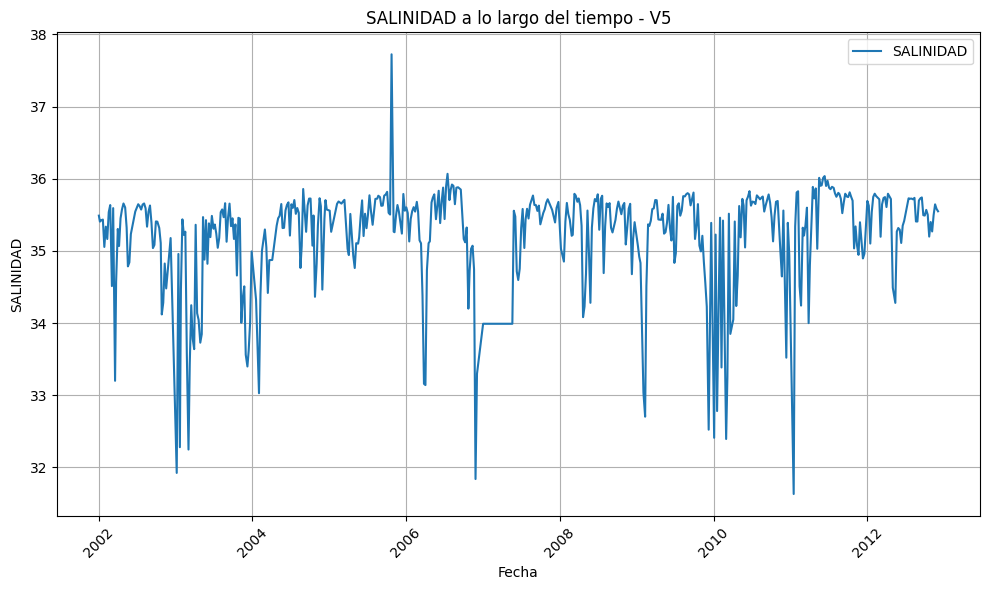

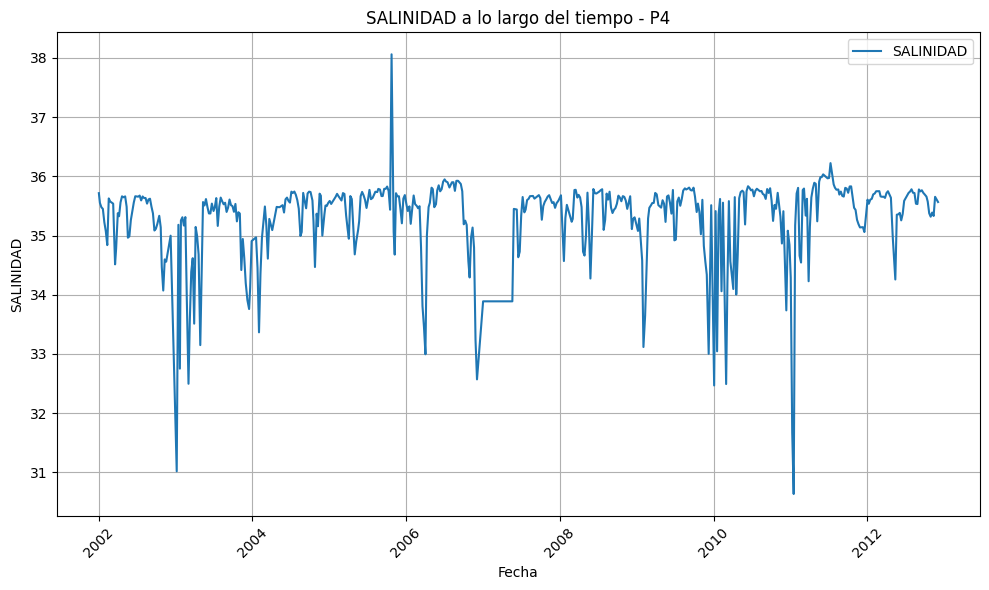

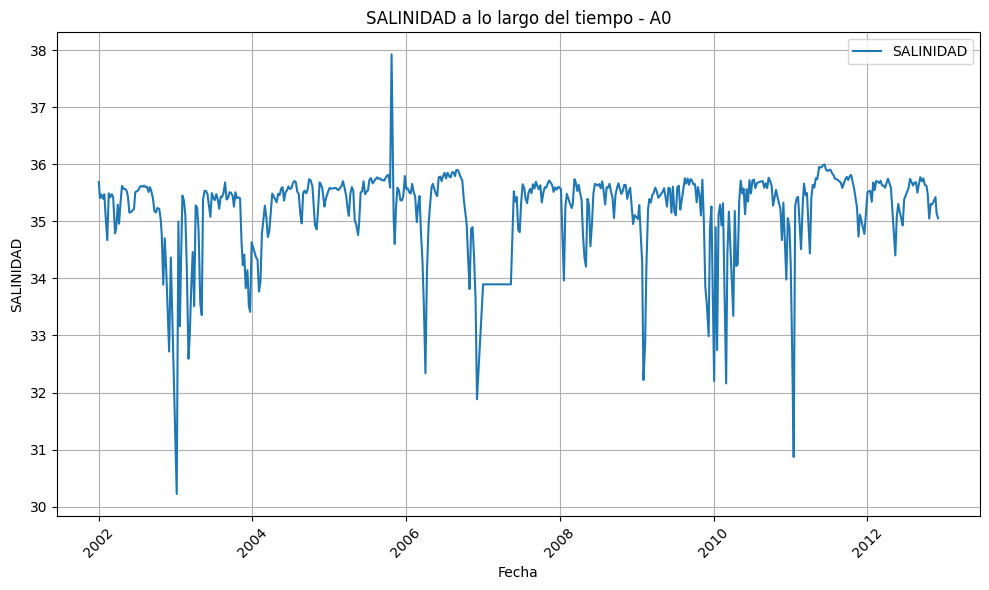

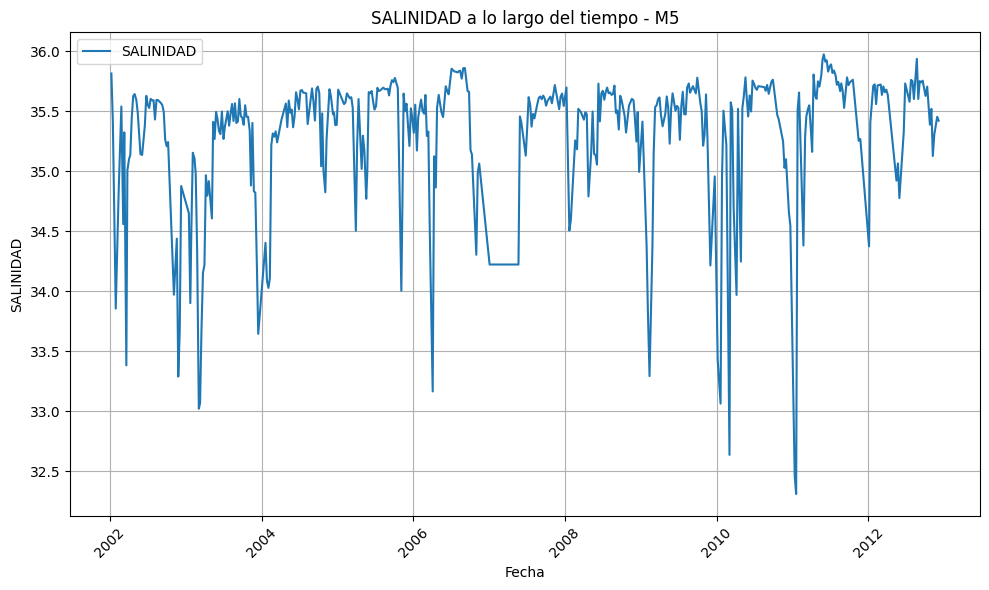

In [10]:
# Obtener las estaciones únicas
estaciones_unicas = data['STATION'].unique()

# Crear una gráfica para cada estación y cada columna
for estacion in estaciones_unicas:
    # Filtrar el dataframe por la estación
    data_estacion = data[data['STATION'] == estacion]
    
    # Convertir la columna 'FECHA' a formato datetime si no lo es
    data_estacion.loc[:, 'FECHA'] = pd.to_datetime(data_estacion['FECHA'])
    
    plt.figure(figsize=(10, 6))
    plt.plot(data_estacion['FECHA'], data_estacion['SALINIDAD'], label='SALINIDAD')
    
    # Títulos y etiquetas
    plt.title(f'{'SALINIDAD'} a lo largo del tiempo - {estacion}')
    plt.xlabel('Fecha')
    plt.ylabel('SALINIDAD')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

In [11]:
data = data.to_json('../data/data.json', orient='records', date_format='iso')